Make (pretty) YBe plots

Shengchao Nov.2022

In [1]:
import numpy as np
from numba import njit
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm, Normalize
import pandas as pd
import pickle
from datetime import datetime
import strax
import straxen
import cutax
from tqdm.notebook import tqdm, trange
strax.utils.tqdm = tqdm
from multihist import Hist1d, Histdd

import copy
from matplotlib import cm
from scipy import stats
import feldman_cousins as fc
from scipy.stats import poisson
from scipy.optimize import minimize, rosen, rosen_der
import h5py

In [78]:
%run -i 'YBe_tool.py'
%run -i 'stuff_to_load.py'

In [12]:
hour=183.78
decay=0.9
gamma_ineff=0.9 #NR inefficincy due to gamma coincident
Y88_hl=106.6
start_to_mid=0.9809

gamma_ratio=0.93356 #gamma ratio between YBe and Y88 run
one_week_decay=np.exp(-7/(Y88_hl/np.log(2))) #fitted source decay rate

sim_ratio=1/(start_to_mid*one_week_decay**2)

s_hour=15393*sim_ratio #hours of simulation, in the same rate as YBe run
b_hour=142.21*gamma_ratio #hours of background run, in the rate, in the same rate as YBe run

bkg_s=hour/b_hour #pre-scaling for Y88 
sim_s=hour/s_hour #pre-scaling for YBe simulation

In [4]:
# data_cuts=pd.read_hdf("good_data.hdf5")
bkg=pd.read_hdf("/dali/lgrandi/ghusheng/YBe_data/YBe_superrun/Y88_event_info_143runs_142.21hrs_all_cuts_with_run_ids.hdf5")
data=pd.read_hdf("/dali/lgrandi/ghusheng/YBe_data/YBe_superrun/YBe_event_info_239runs_183.78hrs_all_cuts_with_run_ids.hdf5")
sim=pd.read_hdf("good_sim.hdf5")

In [6]:
ac_h5 = '/dali/lgrandi/xudc/ac_ybe_1109.h5'

with h5py.File(ac_h5, 'r', libver='latest', swmr=True) as ipt:
    normalization = ipt['fold3_df'].attrs['normalization']

ac_sim = pd.read_hdf(ac_h5, key='fold3_df')#, columns=['cs1', 'cs2', 'cut_fiducial_volume', 'cut_near_wires'])

In [9]:
#quality cuts
data_cuts = data.query(' and '.join(targets_hs[1:]))
bkg_cuts = bkg.query(' and '.join(targets_hs[1:]))
ac_sim_cuts = ac_sim[ac_sim.cut_fiducial_volume]

In [11]:
ac_fix=len(ac_sim_cuts)/len(bkg_cuts)
bkg_sim_s=sim_s/ac_fix

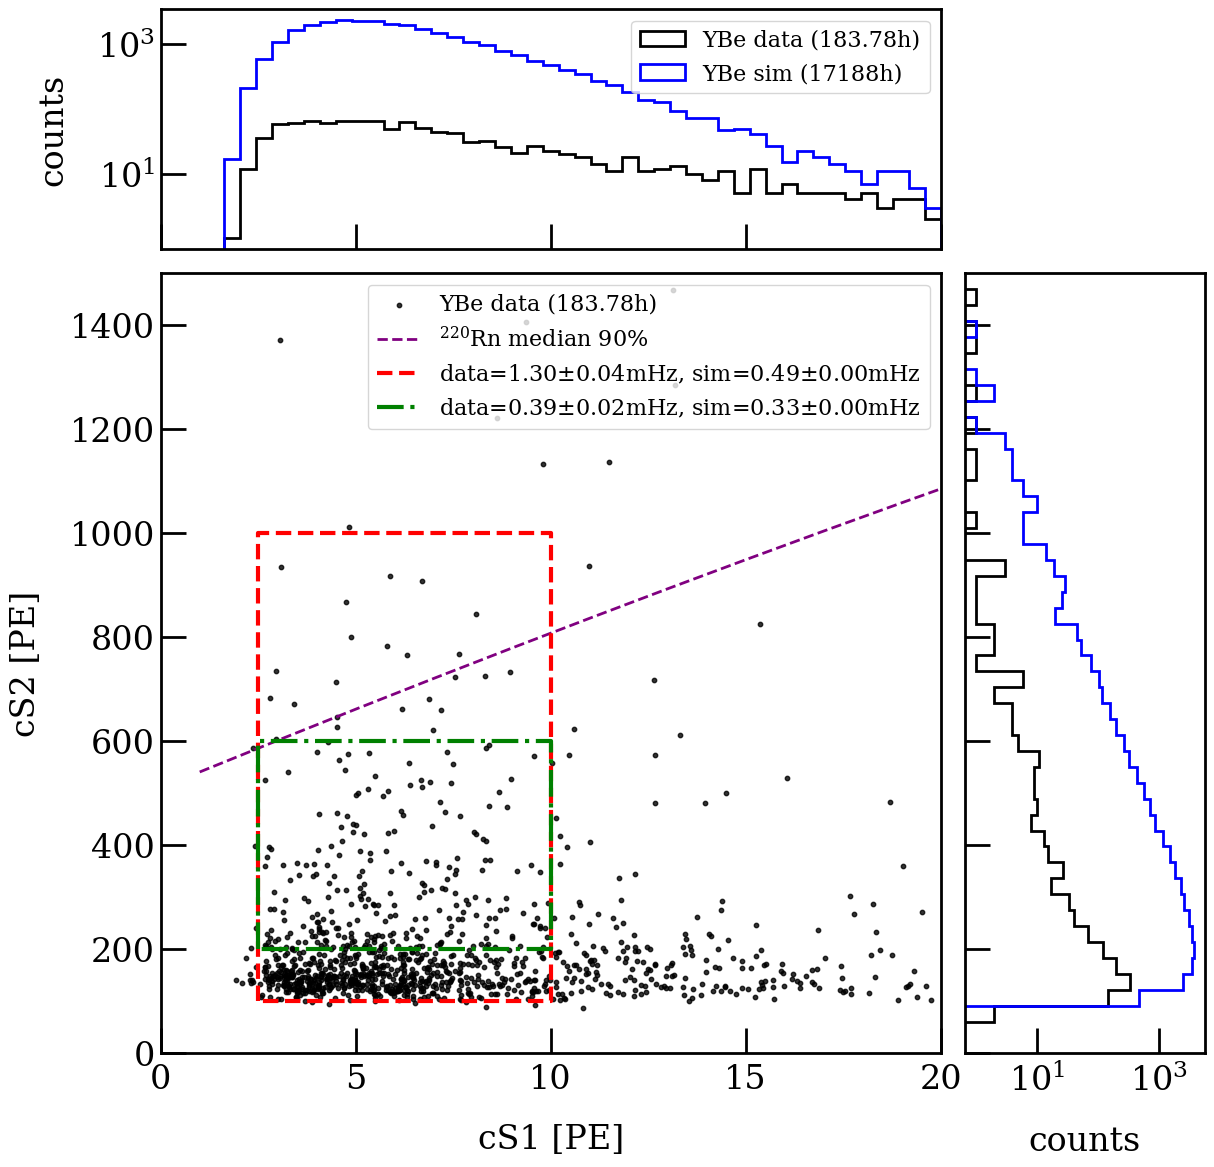

In [79]:
%matplotlib inline
plot_cs1cs2(data_cuts,df_sim=sim,data_label=f'YBe data ({hour}h)',sim_label=f'YBe sim ({s_hour:.0f}h)')#,plot_sim='contour')

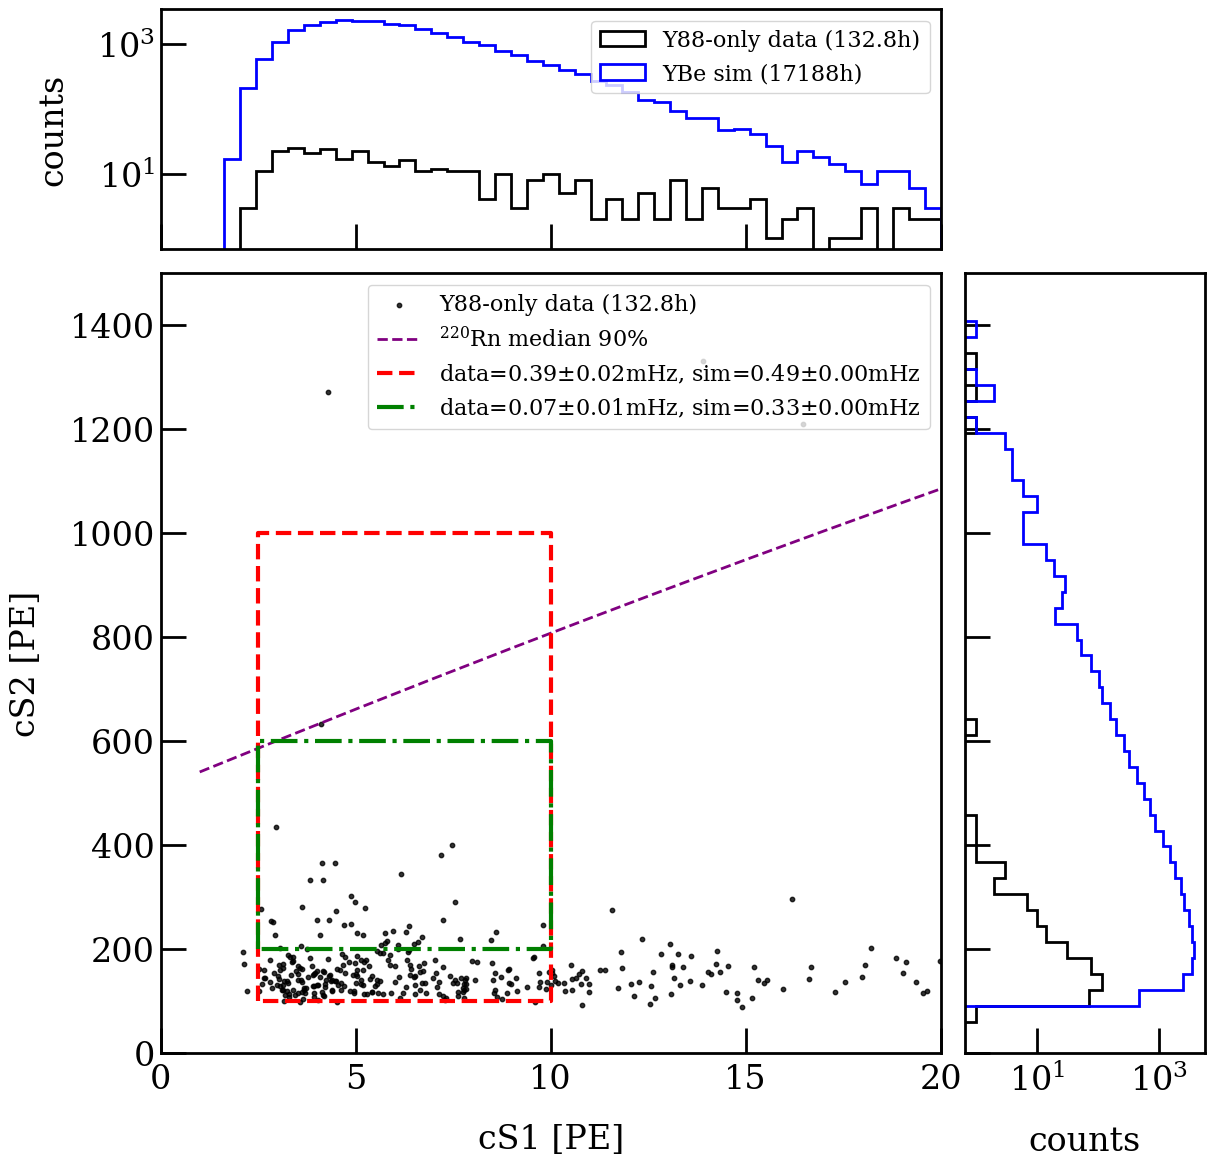

In [83]:
%matplotlib inline
plot_cs1cs2(bkg_cuts,df_sim=sim,data_label=f'Y88-only data ({b_hour:.1f}h)',sim_label=f'YBe sim ({s_hour:.0f}h)')#,plot_sim='contour')

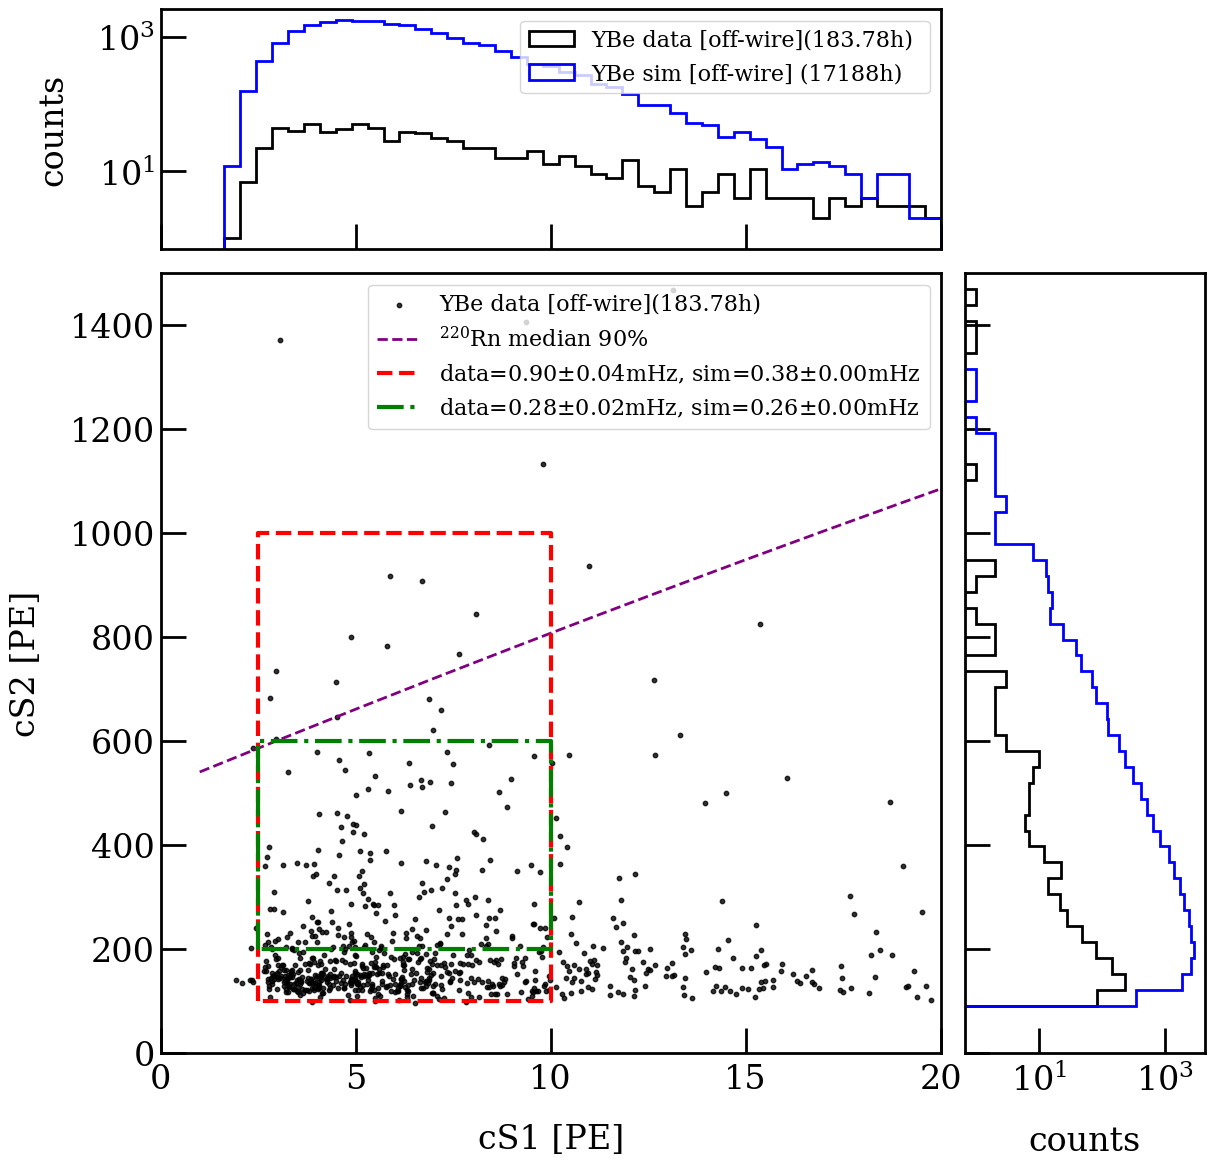

In [88]:
%matplotlib inline
plot_cs1cs2(wire_cut(data_cuts),df_sim=wire_cut(sim),data_label=f'YBe data [off-wire]({hour}h) ',sim_label=f'YBe sim [off-wire] ({s_hour:.0f}h)')#,plot_sim='contour')

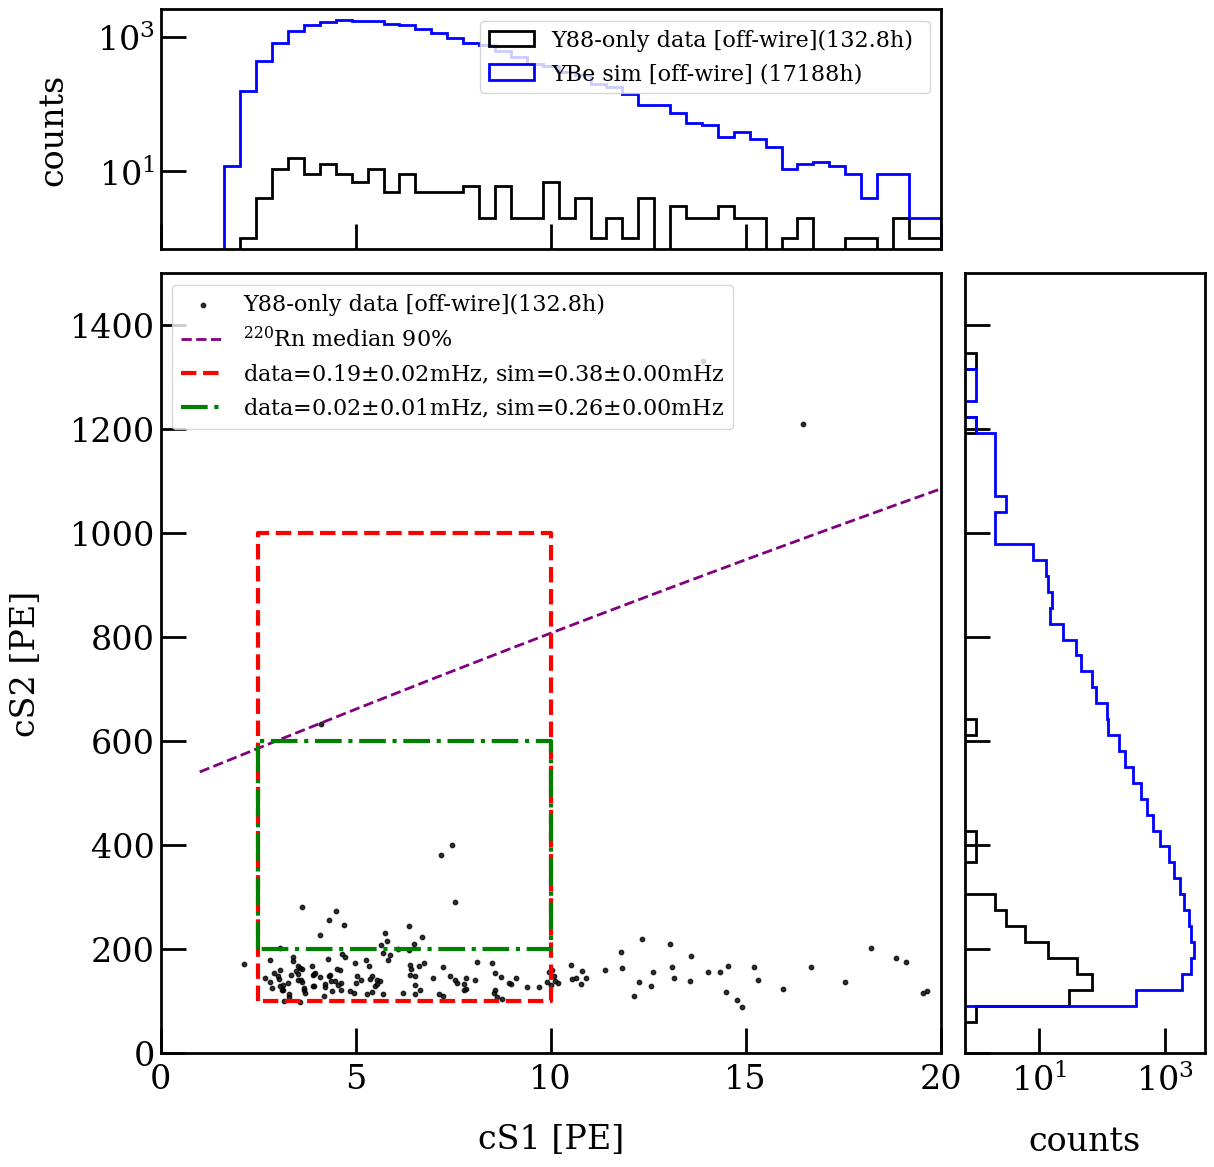

In [91]:
%matplotlib inline
plot_cs1cs2(wire_cut(bkg_cuts),df_sim=wire_cut(sim),data_label=f'Y88-only data [off-wire]({b_hour:.1f}h) ',sim_label=f'YBe sim [off-wire] ({s_hour:.0f}h)')#,plot_sim='contour')

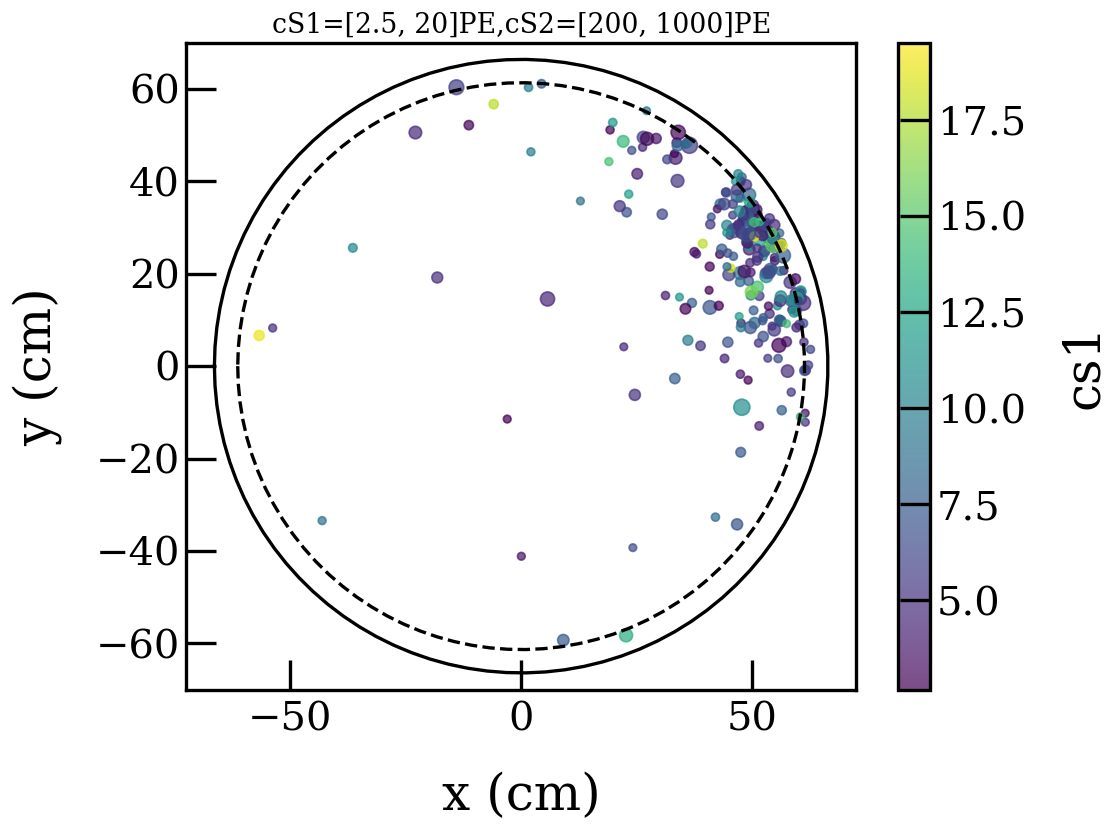

In [110]:
#with wire cut
cs1_range=[2.5,20]
cs2_range=[200,1000]
plot_xy(cut_cs1cs2(wire_cut(data_cuts),cs1=cs1_range,cs2=cs2_range),cs1_range,cs2_range)

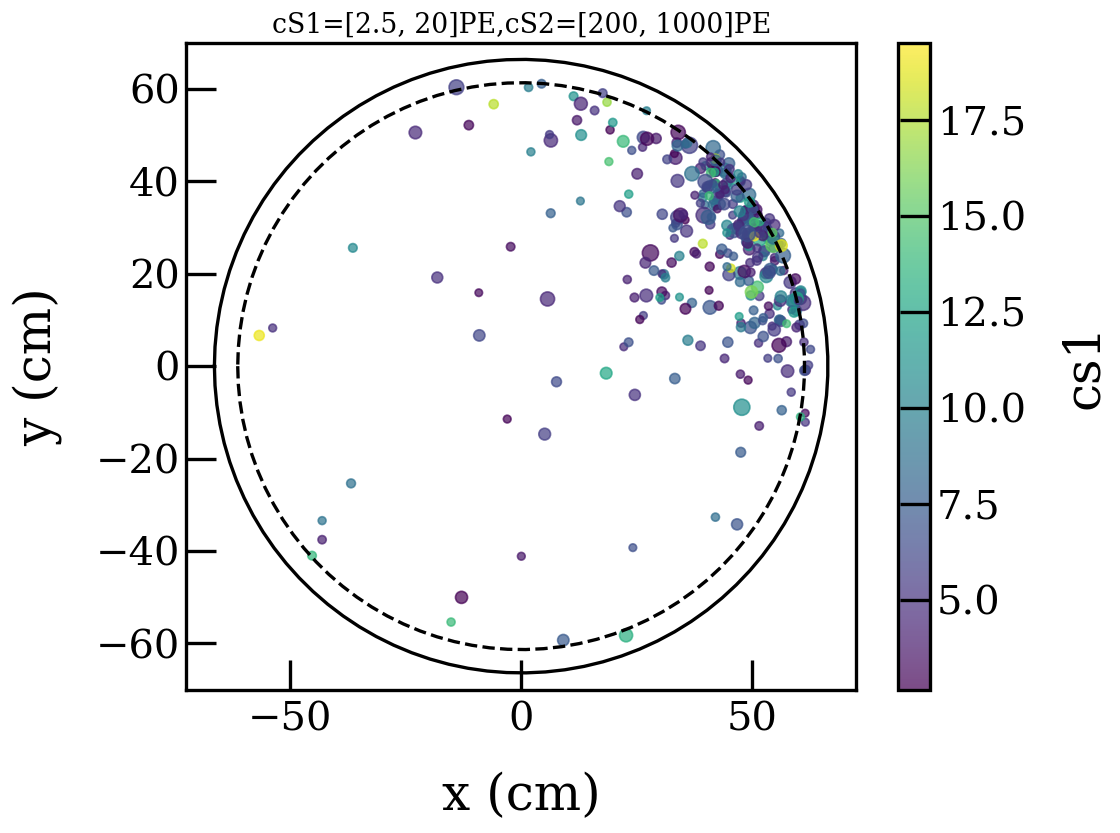

In [111]:
#without wire cut
cs1_range=[2.5,20]
cs2_range=[200,1000]
plot_xy(cut_cs1cs2(data_cuts,cs1=cs1_range,cs2=cs2_range),cs1_range,cs2_range)

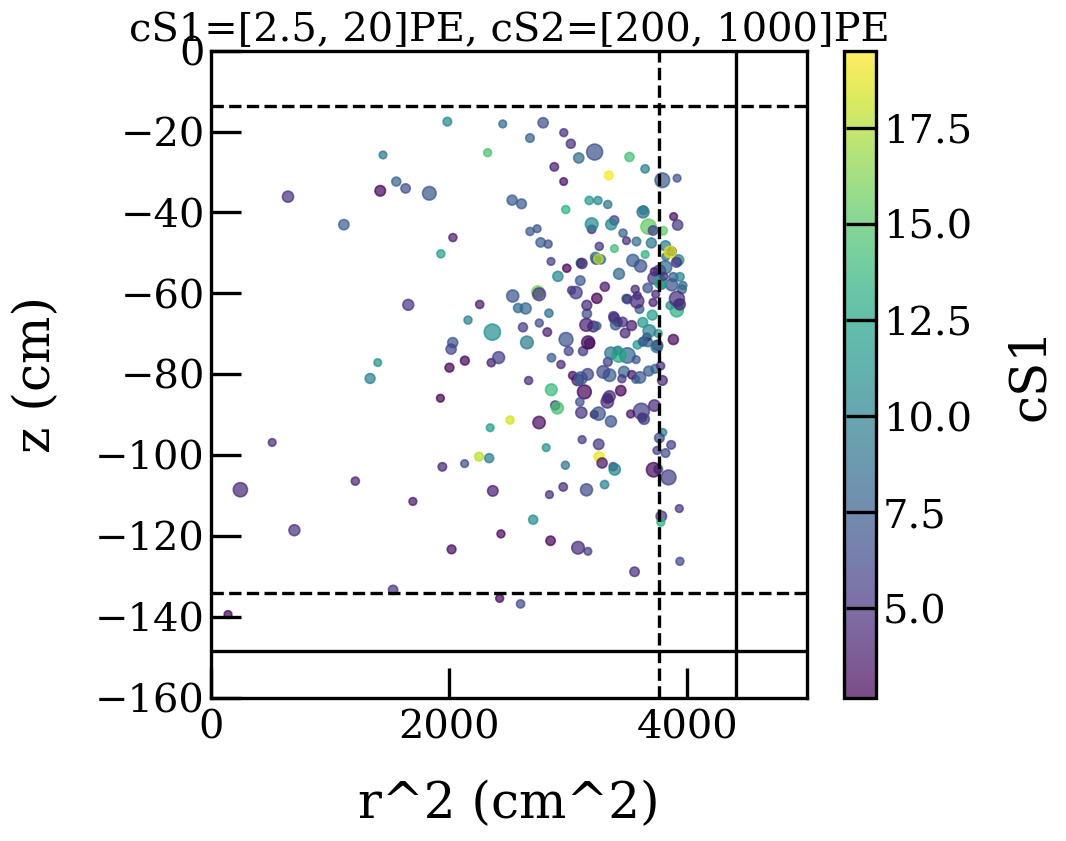

In [109]:
#with wire cut
cs1_range=[2.5,20]
cs2_range=[200,1000]
plot_rz(cut_cs1cs2(wire_cut(data_cuts),cs1=cs1_range,cs2=cs2_range),cs1_range,cs2_range)

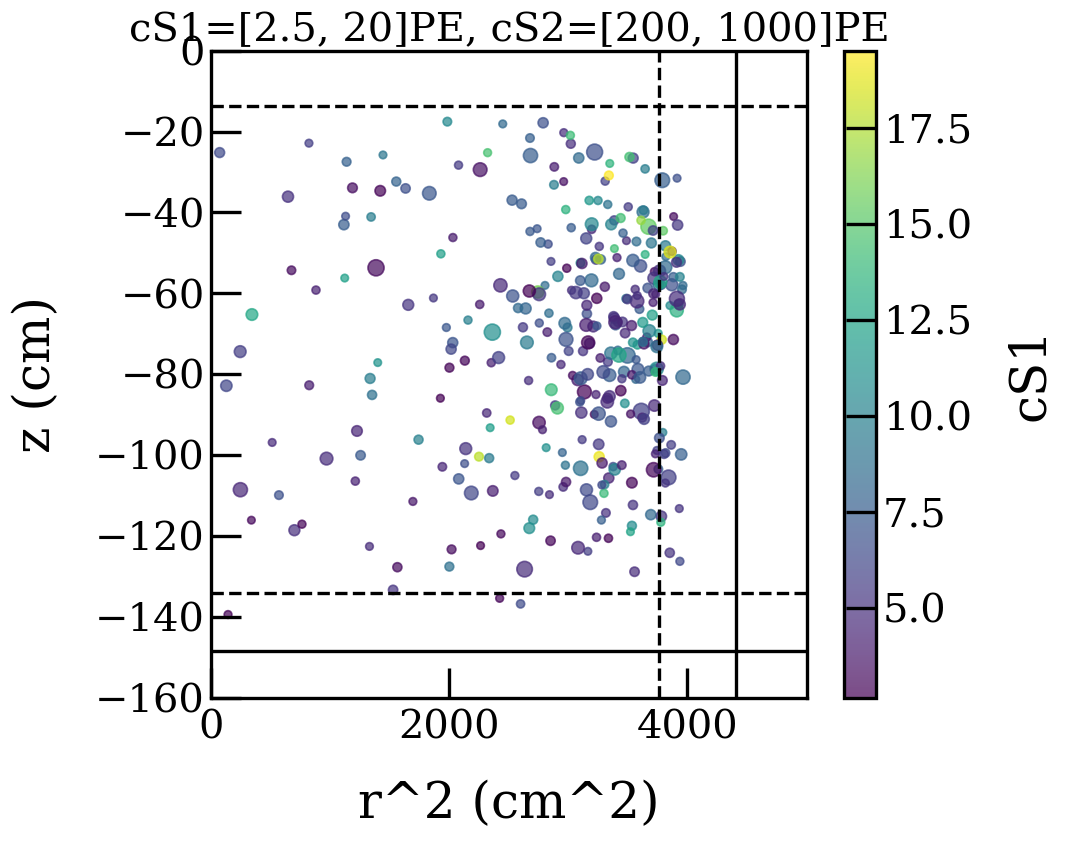

In [113]:
#without wire cut
cs1_range=[2.5,20]
cs2_range=[200,1000]
plot_rz(cut_cs1cs2(data_cuts,cs1=cs1_range,cs2=cs2_range),cs1_range,cs2_range)